# Linear Regression with R-squared cost function from scratch
This is going to take you through steps of creating your own Linear Regression model from scratch; using a the cost function of 'R-squared', which aims to imporve the line of best fit.

In [1]:
#Import librarys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

We will create and use our own data; which will be small, to give a quick demonstration and give a clear understanding

In [2]:
#Our data with x= features, y = labels
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([4,4,6,5,6,7,7,8,8])

We will first define the line of best and the intercept. This can be computed as y = mx + b.
Where 'm' is the slope and 'b' is the y-intercept (where the line crosses the y-axis).

We already have our 'y' and 'x' values, but we will need to get the 'm' and 'b' values. 
1. m = mean(x) • mean(y) - mean(x•y) / mean(x)^2 - mean(x^2)
2. b = mean(y) - m • mean(x)

In [3]:
def best_fit_slope_and_intercept(x,y):
    m = (((np.mean(x) * np.mean(y)) - np.mean(x * y)) /
        ((np.mean(x)**2) - (np.mean(x**2))))
    b = np.mean(y) - m * np.mean(x)
    return m, b

We will now create our cost function. We will use R-squared, which is a statistical measure of how close the data are to the fitted regression line. If the squared error line is small, then the line is a good fit. 

**SE = squared error**
1. SE of regression line = (y(1)-(mx+b))^2 + (y(2)-(mx+b))^2 + ... (y(n)-(mx+b))^2
2. SE of mean(y) = (y(1)-mean(y)) + (y(2)-mean(y)) + ... (y(n)-mean(y))
3. R-squared = 1 - SE of regression line / SE of mean(y)

In [4]:
def squared_error(y_actual, y_predicted):
    return sum((y_predicted-y_actual)**2)

def coefficient(y_actual, y_predicted):
    y_mean_line = [np.mean(y_actual) for i in y_actual]
    sqaured_error_reg = squared_error(y_actual, y_predicted)
    sqaured_error_mean = squared_error(y_actual, y_mean_line)
    return 1 - (sqaured_error_reg / sqaured_error_mean)

In [5]:
m,b = best_fit_slope_and_intercept(x,y)

#The new line of best fit
reg_line = (m*x)+b

That is it, we have computed the line of best fit with the R-squared error. We can now visualise this in a table and graph.

In [6]:
#The error
r_squared_error = reg_line - y

df = pd.DataFrame({ 'x-axis' : pd.Series(x), 
                    'y-axis' : pd.Series(y), 
                    'Estimated(y)': pd.Series(reg_line),
                    'Error' : pd.Series(r_squared_error) })
df = df[['x-axis','y-axis','Estimated(y)','Error']]
df

,x-axis,y-axis,Estimated(y),Error
0,1,4,3.977778,-0.022222
1,2,4,4.511111,0.511111
2,3,6,5.044444,-0.955556
3,4,5,5.577778,0.577778
4,5,6,6.111111,0.111111
5,6,7,6.644444,-0.355556
6,7,7,7.177778,0.177778
7,8,8,7.711111,-0.288889
8,9,8,8.244444,0.244444


In [7]:
r_squared = coefficient(y, reg_line)
r_squared

0.9035294117647058

In [9]:
predict_x = 7
predict_y = (m*predict_x) + b

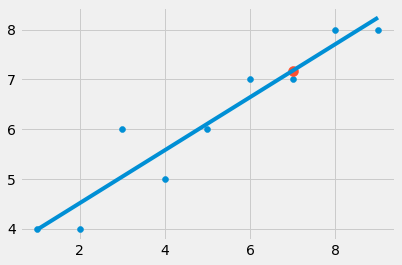

In [12]:
plt.scatter(x,y)
plt.scatter(predict_x,predict_y, s=100)
plt.plot(x,reg_line)
plt.show()